In [19]:
import pandas as pd

In [20]:
rs = pd.read_csv("data/nyc_rideshare.csv")
rs.shape

(16420301, 6)

In [21]:
rs.head()

,provider,pickup_datetime,dropoff_datetime,pickup_location_id,dropoff_location_id,shared_ride
0,1,01-13-15 17:49:59,NaN,137.0,NaN,NaN
1,1,01-20-15 19:44:50,NaN,163.0,NaN,NaN
2,1,01-10-15 17:47:07,NaN,161.0,NaN,NaN
3,1,01-05-15 21:39:19,NaN,263.0,NaN,NaN
4,1,01-17-15 17:36:12,NaN,112.0,NaN,NaN


In [22]:
from datetime import datetime
def date_to_days(date):
    return date.split(" ")[0]

rs["date"] = rs["pickup_datetime"].apply(date_to_days)

In [23]:
rs.head()

,provider,pickup_datetime,dropoff_datetime,pickup_location_id,dropoff_location_id,shared_ride,date
0,1,01-13-15 17:49:59,NaN,137.0,NaN,NaN,01-13-15
1,1,01-20-15 19:44:50,NaN,163.0,NaN,NaN,01-20-15
2,1,01-10-15 17:47:07,NaN,161.0,NaN,NaN,01-10-15
3,1,01-05-15 21:39:19,NaN,263.0,NaN,NaN,01-05-15
4,1,01-17-15 17:36:12,NaN,112.0,NaN,NaN,01-17-15


In [25]:
trips = rs.groupby("date")["shared_ride"].count()

In [27]:
df = pd.DataFrame(trips[trips > 0])

In [28]:
df.head()

,shared_ride
date,
01-01-18,3633
01-01-19,4312
01-02-18,3005
01-02-19,3503
01-03-18,3253


In [30]:
df.reset_index(inplace=True)

In [31]:
def daysFrom(date):
    startDate = datetime.strptime('6/1/2013', "%m/%d/%Y")
    endDate = datetime.strptime(date, "%m-%d-%y")
    return (endDate-startDate).days

df["daysFrom"] = df["date"].apply(daysFrom)

In [33]:
df.head().sort_values("daysFrom")

,date,shared_ride,daysFrom
0,01-01-18,3633,1675
2,01-02-18,3005,1676
4,01-03-18,3253,1677
1,01-01-19,4312,2040
3,01-02-19,3503,2041


In [52]:
1675 + 365

2040

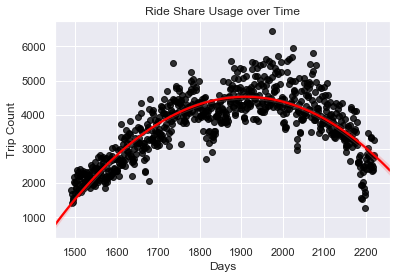

In [72]:
import seaborn as sns
sns.set()
fig = sns.regplot(df["daysFrom"], df["shared_ride"], order=2, scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.set_title("Ride Share Usage over Time")
fig.set_ylabel("Trip Count")
fig.set_xlabel("Days")
out = fig.get_figure()
out.savefig("rideshare_time_trend.png")

In [42]:
w = pd.read_csv("aggregate_data.csv")

In [87]:
w.head()

,DATE,Temperature,Snow,Wind,date,Trips,daysFrom
0,6/1/13 23:59,82.0,0.0,12.0,06-01-13,109.0,0
1,6/2/13 23:59,79.0,0.0,15.0,06-02-13,189.0,1
2,6/3/13 23:59,72.0,0.0,12.0,06-03-13,90.0,2
3,6/4/13 23:59,66.0,0.0,13.0,06-04-13,186.0,3
4,6/5/13 23:59,66.0,0.0,10.0,06-05-13,168.0,4


(1675, 2040)

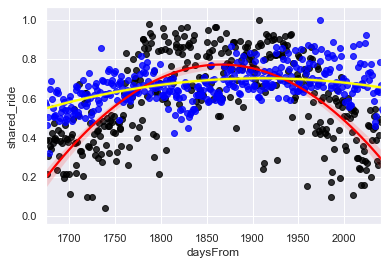

In [89]:
import numpy as np
fig = sns.regplot(np.arange(1675, 2041), w["Trips"][1675:2041] / w["Trips"][1675:2041].max(), scatter_kws={"color": "black"}, line_kws={"color": "red"}, order=2)
fig = sns.regplot(df["daysFrom"], df["shared_ride"] / df["shared_ride"].max(), order=2, scatter_kws={"color": "blue"}, line_kws={"color": "yellow"})

fig.set_xlim([1675, 2040])

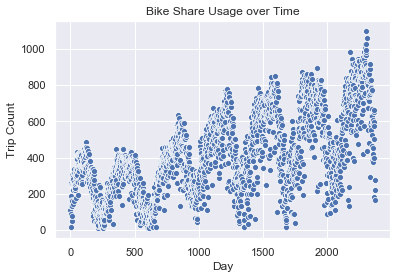

In [69]:
import numpy as np
fig = sns.scatterplot(w["daysFrom"], w["tripduration"])
fig.set_title("Bike Share Usage over Time")
fig.set_ylabel("Trip Count")
fig.set_xlabel("Day")
out = fig.get_figure()
out.savefig("time_trend.png")

In [64]:
np.corrcoef(w["tripduration"][1675:2040], df["shared_ride"][0:365])

array([[1.       , 0.1347393],
       [0.1347393, 1.       ]])

In [61]:
len(w["tripduration"][1675:2041])

366

In [63]:
len(df["shared_ride"])

730

In [77]:
w = w.rename(columns={"DailyAverageDryBulbTemperature": "Temperature", "DailySnowDepth": "Snow", "DailySustainedWindSpeed": "Wind", "tripduration": "Trips", "daysFrom": "Date"})

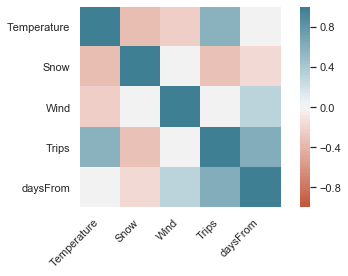

In [85]:
corr = w.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.figure.tight_layout()
out = ax.get_figure()
out.savefig("corrmat.png")